# **Predicting Depression: Machine Learning Challenge**

**In here we cleaning, transforming, and organizing raw data into a format suitable for machine learning models. It ensures that the data is consistent, accurate, and ready for analysis.**

*First of all Let's import relevent libraries*

In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **Load the Data set and get basic insights**

In [3]:
df = pd.read_csv('../data/extracted_data/train.csv', index_col='id')

genDf = pd.read_csv('../data/extracted_data/createdData.csv')

genDf['Depression'] = genDf['Depression'].map({
    'No': 0,
    'Yes': 1
})

df = pd.concat([df, genDf], ignore_index=True)

In [5]:
df_test = pd.read_csv('../data/extracted_data/test.csv', index_col='id')
df_test.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
id,,,,,,,,,,,,,,,,,,
140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


### **Check and Fill the Null Values**

In [18]:
df.isnull().sum()

Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                37303
Academic Pressure                        114857
Work Pressure                             28420
CGPA                                     114856
Study Satisfaction                       114857
Job Satisfaction                          28412
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

***Let's Divide Dataset into two parts Based on Profession***

In [6]:
df_student = df[df['Working Professional or Student'] == 'Student']  
df_test_student = df_test[df_test['Working Professional or Student'] == 'Student'].copy()

df_Wf = df[df['Working Professional or Student'] != 'Student']  
df_test_Wf = df_test[df_test['Working Professional or Student'] != 'Student'].copy()

In [7]:
df_student['Profession'] = np.where(df_student['Age'] < 25, 'Student', 'No Profession')
df_test_student['Profession'] = np.where(df_test_student['Age'] < 25, 'Student', 'No Profession')

df_Wf['Profession'] = df_Wf['Profession'].fillna('No Profession')
df_test_Wf['Profession'] = df_test_Wf['Profession'].fillna('No Profession')

df_student['CGPA'] = df_student['CGPA'].fillna(0)
df_test_student['CGPA'] = df_test_student['CGPA'].fillna(0)

df_student['CGPA'] = pd.to_numeric(df_student['CGPA'], errors='coerce').fillna(0)
df_test_student['CGPA'] = pd.to_numeric(df_test_student['CGPA'], errors='coerce').fillna(0)


In [8]:
for col in df_student.columns:
    if df_student[col].dtype == 'object':  # For text-based columns
        df_student[col] = df_student[col].fillna('None')
    elif pd.api.types.is_categorical_dtype(df_student[col]):  # For categorical columns
        df_student[col] = df_student[col].cat.add_categories([-1]).fillna(-1)
    else:  # For numerical columns
        df_student[col] = df_student[col].fillna(-1)

for col in df_test_student.columns:
    if df_test_student[col].dtype == 'object':  # For text-based columns
        df_test_student[col] = df_test_student[col].fillna('None')
    elif pd.api.types.is_categorical_dtype(df_test_student[col]):  # For categorical columns
        df_test_student[col] = df_test_student[col].cat.add_categories([-1]).fillna(-1)
    else:  # For numerical columns
        df_test_student[col] = df_test_student[col].fillna(-1)


for col in df_Wf.columns:
    if df_Wf[col].dtype == 'object':  # For text-based columns
        df_Wf[col] = df_Wf[col].fillna('None')
    elif pd.api.types.is_categorical_dtype(df_Wf[col]):  # For categorical columns
        df_Wf[col] = df_Wf[col].cat.add_categories([-1]).fillna(-1)
    else:  # For numerical columns
        df_Wf[col] = df_Wf[col].fillna(-1)

for col in df_test_Wf.columns:
    if df_test_Wf[col].dtype == 'object':  # For text-based columns
        df_test_Wf[col] = df_test_Wf[col].fillna('None')
    elif pd.api.types.is_categorical_dtype(df_test_Wf[col]):  # For categorical columns
        df_test_Wf[col] = df_test_Wf[col].cat.add_categories([-1]).fillna(-1)
    else:  # For numerical columns
        df_test_Wf[col] = df_test_Wf[col].fillna(-1)

In [9]:
print(df_student.isnull().sum())
print(df_Wf.isnull().sum())

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Name                                     0
Gender                                   0
Age                                      0
City                                     

### **Create Different CGPA bins**

In [10]:
# Apply pd.cut to create CGPA categories
df_student['CGPA_Category_1'] = pd.cut(df_student['CGPA'], bins=[0, 4, 5,  6,  7,  8, 9, float('inf')], 
                             labels=['0', '4-5','5-6', '6-7', '7-8', '8-9',  '9+'], 
                             include_lowest=True)

df_test_student['CGPA_Category_1'] = pd.cut(df_test_student['CGPA'], bins=[0, 4, 5,  6,  7,  8, 9, float('inf')], 
                             labels=['0', '4-5','5-6', '6-7', '7-8', '8-9',  '9+'], 
                             include_lowest=True)

<Axes: xlabel='CGPA_Category_1'>

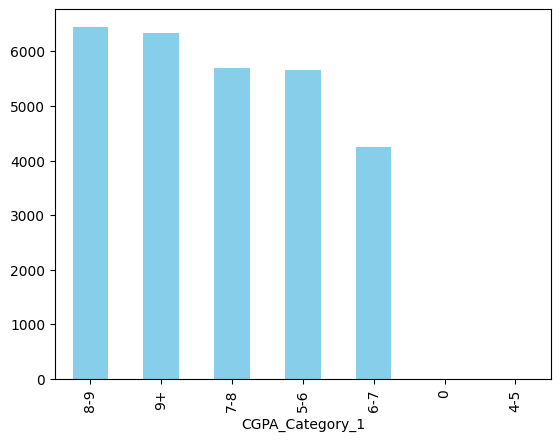

In [11]:
df_student['CGPA_Category_1'].value_counts().plot(kind='bar' , color='skyblue')

### **Drop Name column**

In [25]:
df_student.drop(['Name'], axis=1, inplace=True)
df_test_student.drop(['Name'], axis=1, inplace=True)

df_Wf.drop(['Name'], axis=1, inplace=True)
df_test_Wf.drop(['Name'], axis=1, inplace=True)


# Getonly student where Age < 45
df_student = df_student[df_student['Age'] <= 45]

### **One Hot Encoding**

In [26]:


def one_hot_encode(df, column):
    df = pd.get_dummies(df, columns=[column], drop_first=False)  # Keep all categories
    return df

# Apply one-hot encoding one by one
df_student = one_hot_encode(df_student, 'Gender')
df_student = one_hot_encode(df_student, 'Working Professional or Student')
df_student = one_hot_encode(df_student, 'Profession')
df_student = one_hot_encode(df_student, 'Degree')
df_student = one_hot_encode(df_student, 'Have you ever had suicidal thoughts ?')
df_student = one_hot_encode(df_student, 'Family History of Mental Illness')
df_student = one_hot_encode(df_student, 'Age')
df_student = one_hot_encode(df_student, 'CGPA_Category_1')
#df_copy = one_hot_encode(df_copy, 'CGPA')
df_student = one_hot_encode(df_student,'Sleep Duration')
df_student = one_hot_encode(df_student,'City')
df_student = one_hot_encode(df_student,'Work/Study Hours')

df_test_student = one_hot_encode(df_test_student, 'Gender')
df_test_student = one_hot_encode(df_test_student, 'Working Professional or Student')
df_test_student = one_hot_encode(df_test_student, 'Profession')
df_test_student = one_hot_encode(df_test_student, 'Degree')
df_test_student = one_hot_encode(df_test_student, 'Have you ever had suicidal thoughts ?')
df_test_student = one_hot_encode(df_test_student, 'Family History of Mental Illness')
df_test_student = one_hot_encode(df_test_student, 'Age')
df_test_student = one_hot_encode(df_test_student, 'CGPA_Category_1')
#df_test_copy = one_hot_encode(df_test_copy, 'CGPA')
df_test_student = one_hot_encode(df_test_student,'Sleep Duration')
df_test_student = one_hot_encode(df_test_student,'City')
df_test_student = one_hot_encode(df_test_student,'Work/Study Hours')

df_Wf = one_hot_encode(df_Wf,'Gender')
df_Wf = one_hot_encode(df_Wf,'Working Professional or Student')
df_Wf = one_hot_encode(df_Wf,'Profession')
df_Wf = one_hot_encode(df_Wf,'Degree')
df_Wf = one_hot_encode(df_Wf,'Have you ever had suicidal thoughts ?')
df_Wf = one_hot_encode(df_Wf,'Family History of Mental Illness')
df_Wf = one_hot_encode(df_Wf,'Age')
#df_Wf = one_hot_encode(df_Wf,'CGPA_Category_1')
#df_copy = one_hot_encode(df_copy,'CGPA')
df_Wf = one_hot_encode(df_Wf,'Sleep Duration')
df_Wf = one_hot_encode(df_Wf,'City')
df_Wf = one_hot_encode(df_Wf,'Work/Study Hours')

df_test_Wf = one_hot_encode(df_test_Wf, 'Gender')
df_test_Wf = one_hot_encode(df_test_Wf, 'Working Professional or Student')
df_test_Wf = one_hot_encode(df_test_Wf, 'Profession')
df_test_Wf = one_hot_encode(df_test_Wf, 'Degree')
df_test_Wf = one_hot_encode(df_test_Wf, 'Have you ever had suicidal thoughts ?')
df_test_Wf = one_hot_encode(df_test_Wf, 'Family History of Mental Illness')
df_test_Wf = one_hot_encode(df_test_Wf, 'Age')
#df_test_Wf = one_hot_encode(df_test_Wf, 'CGPA_Category_1')
#df_test_copy = one_hot_encode(df_test_copy, 'CGPA')
df_test_Wf = one_hot_encode(df_test_Wf,'Sleep Duration')
df_test_Wf = one_hot_encode(df_test_Wf,'City')
df_test_Wf = one_hot_encode(df_test_Wf,'Work/Study Hours')


In [27]:
# Define the valid categories
valid_categories = {'moderate': 'Moderate', 'unhealthy': 'Unhealthy', 'healthy': 'Healthy'}

# Function to clean and categorize dietary habits
def categorize_dietary_habits(value):
    value = str(value).strip().lower()  # Convert to string, strip spaces, and lowercase
    return valid_categories.get(value, 'Other')  # Map known values, else assign 'Other'

# Apply the function to the column
df_student['Dietary_Habits'] = df_student['Dietary Habits'].apply(categorize_dietary_habits)
df_test_student['Dietary_Habits'] = df_test_student['Dietary Habits'].apply(categorize_dietary_habits)

df_Wf['Dietary_Habits'] = df_Wf['Dietary Habits'].apply(categorize_dietary_habits)
df_test_Wf['Dietary_Habits'] = df_test_Wf['Dietary Habits'].apply(categorize_dietary_habits)


In [28]:
df_student = one_hot_encode(df_student, 'Dietary_Habits')
df_test_student = one_hot_encode(df_test_student, 'Dietary_Habits')

df_Wf = one_hot_encode(df_Wf, 'Dietary_Habits')
df_test_Wf = one_hot_encode(df_test_Wf, 'Dietary_Habits')

In [29]:
df_student.drop(['Dietary Habits'], axis=1, inplace=True)
df_test_student.drop(['Dietary Habits'], axis=1, inplace=True)

df_Wf.drop(['Dietary Habits'], axis=1, inplace=True)
df_test_Wf.drop(['Dietary Habits'], axis=1, inplace=True)

In [30]:
df_student = one_hot_encode(df_student, 'Academic Pressure')
df_student = one_hot_encode(df_student, 'Financial Stress')
df_student = one_hot_encode(df_student, 'Study Satisfaction')

df_test_student = one_hot_encode(df_test_student, 'Academic Pressure')
df_test_student = one_hot_encode(df_test_student, 'Financial Stress')
df_test_student = one_hot_encode(df_test_student, 'Study Satisfaction')

df_Wf = one_hot_encode(df_Wf, 'Work Pressure')
df_Wf = one_hot_encode(df_Wf, 'Financial Stress')
df_Wf = one_hot_encode(df_Wf, 'Job Satisfaction')

df_test_Wf = one_hot_encode(df_test_Wf, 'Work Pressure')
df_test_Wf = one_hot_encode(df_test_Wf, 'Financial Stress')
df_test_Wf = one_hot_encode(df_test_Wf, 'Job Satisfaction')

In [31]:
# Convert only boolean columns to integers (0/1)
bool_cols = df_student.select_dtypes(include=['bool']).columns
df_student[bool_cols] = df_student[bool_cols].astype(int)

bool_cols_test = df_test_student.select_dtypes(include=['bool']).columns
df_test_student[bool_cols_test] = df_test_student[bool_cols_test].astype(int)

bool_cols_Wf = df_Wf.select_dtypes(include=['bool']).columns
df_Wf[bool_cols_Wf] = df_Wf[bool_cols_Wf].astype(int)

bool_cols_test_Wf = df_test_Wf.select_dtypes(include=['bool']).columns
df_test_Wf[bool_cols_test_Wf] = df_test_Wf[bool_cols_test_Wf].astype(int)


### **Drop Less Important Columns**

In [32]:

df_student.drop(['Gender_Male','Working Professional or Student_Student','Have you ever had suicidal thoughts ?_Yes','Family History of Mental Illness_Yes','Work Pressure','Job Satisfaction','CGPA'], axis=1, inplace=True)
df_test_student.drop(['Gender_Male','Working Professional or Student_Student','Have you ever had suicidal thoughts ?_Yes','Family History of Mental Illness_Yes','Work Pressure','Job Satisfaction','CGPA'], axis=1, inplace=True)

df_Wf.drop(['Gender_Male','Working Professional or Student_Working Professional','Have you ever had suicidal thoughts ?_Yes','Family History of Mental Illness_Yes','CGPA','Study Satisfaction','Academic Pressure'], axis=1, inplace=True)
df_test_Wf.drop(['Gender_Male','Working Professional or Student_Working Professional','Have you ever had suicidal thoughts ?_Yes','Family History of Mental Illness_Yes','CGPA','Study Satisfaction','Academic Pressure'], axis=1, inplace=True)



In [36]:
df_student.head()

,Depression,Gender_Female,Profession_No Profession,Profession_Student,Degree_0,Degree_20,Degree_24,Degree_7.06,Degree_8.56,Degree_B,...,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Study Satisfaction_-1.0,Study Satisfaction_1.0,Study Satisfaction_2.0,Study Satisfaction_3.0,Study Satisfaction_4.0,Study Satisfaction_5.0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
26,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
32,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### **Save the Datset**

In [34]:

df_student.to_csv('../data/processed_data/train_student.csv', index=False)
df_test_student.to_csv('../data/processed_data/test_student.csv', index=True)

df_Wf.to_csv('../data/processed_data/train_Wf.csv', index=False)
df_test_Wf.to_csv('../data/processed_data/test_Wf.csv', index=True)